# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- **Which variables are significant in predicting the demand for shared bikes.**
- **How well those variables describe the bike demands**
  

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data Prepration

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

# Model Building

**The Model should be built taking the 'cnt' as the target variable. cnt is the sum of casual and registered users who have made a booking on the give day.**

## Model Building Steps

The Model building will include below steps at a high level.

1. Importing and Visualizing the dat
2. Preparing the data for modelling
3. Training the model
4. Residual Analysis
5. Predictions and evaluation

## Importing the Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', True)

## Importing the Data

In [4]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
print(bike_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


**Inference**
- Data contains 730 data points
- Data contains 16 columns
- There are no null values in the data, so we don't need to treat the data for null values.
- Except **dteday**, there are no categorical columns.

## Data Understanding from data dictionary

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**Inference**

Based on the above directory, we can split the varialbes in numerical and categorical. 

- Numberical variables
  - temp
  - atemp
  - hum
  - windspeed
  - casual
  - registered
  - cnt
- Categorical Variables
  - season
  - yr
  - mnth
  - holiday
  - weekday
  - workingday
  - weathersit

As per the data dictionary and understanding derived from the business goals, we can drop following columns. reasoing behind dropping every column is also listed.
- instant: This is just the record index and will have no impact on the model.
- dteday: This is date when the data was collected, holiday, weekday, workingday columns have already been extracted from the date column, so this column would have no actual impact.
- casual: List of casual users who booked a bike on that day, although this might have some patterns this is not the target variable for the model and this will not be a predictor as well.
- registered: Similar to casual.

## Data Cleaning

### Dropping Unwanted columns

In [6]:
print("Shape before dropping the columns: ", bike_sharing.shape)

columns_to_drop =['instant','dteday','casual','registered']

bike_sharing.drop(columns_to_drop,inplace=True,axis=1)

print("Shape after dropping the columns: ", bike_sharing.shape)

Shape before dropping the columns:  (730, 16)
Shape after dropping the columns:  (730, 12)


### Null Value check

In [7]:
bike_sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Inference**

There are no null values in any of the columns.

### Duplicate Value Check

In [8]:
bike_sharing_copy = bike_sharing.copy()

print("Shape before dropping duplicate values: ", bike_sharing.shape)

bike_sharing_copy.drop_duplicates(inplace=True)

print("Shape after dropping duplicate values: ", bike_sharing_copy.shape)

Shape before dropping duplicate values:  (730, 12)
Shape after dropping duplicate values:  (730, 12)


**Inference**

- There are no duplicate rows in the data.

## Visualizing the Data

We'll visualize the numberical and categorical columns and try to figure out if there is any visible multicollinearity.

### Visualizing the Numerical variables.

<Figure size 1000x1000 with 0 Axes>

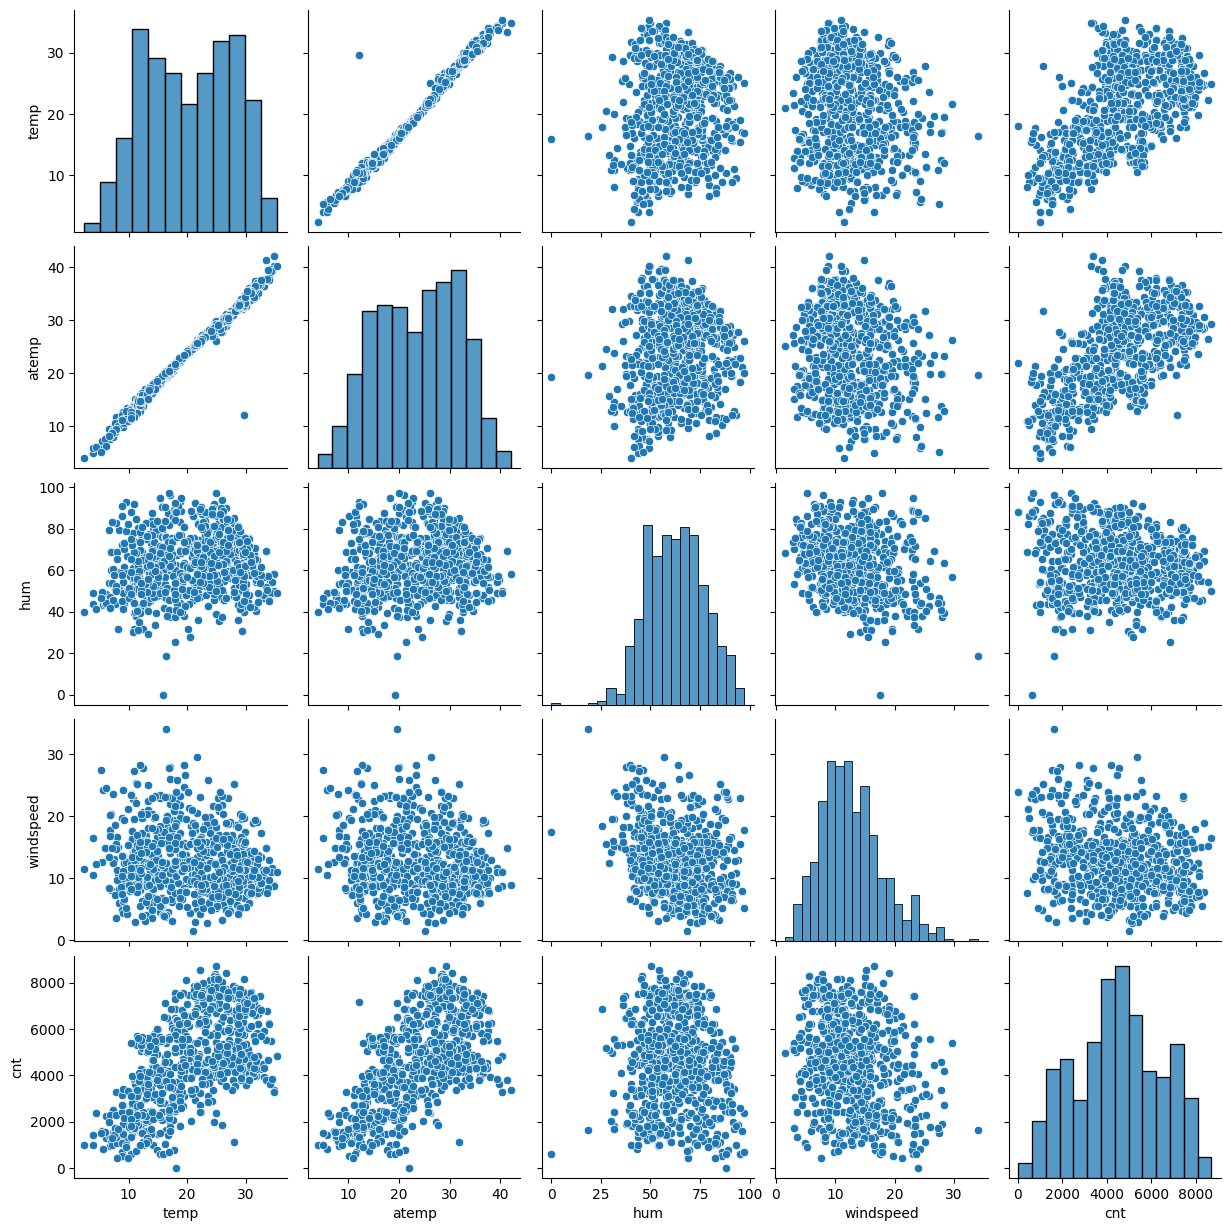

In [9]:
numerical_variables = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize=(10,10))
sns.pairplot(bike_sharing[numerical_variables])
plt.show()

**Inferences**

From above we can see that- 
- atemp and temp are highly correlated.
- temp and cnt seems to be correlated. 
- atemp and cnt also seems to have similar correlation, which is understandable as atemp more or less depends on temp.


### Correlation Map

Let's plot the correlations on a heat map and check which variables are highly correlated.

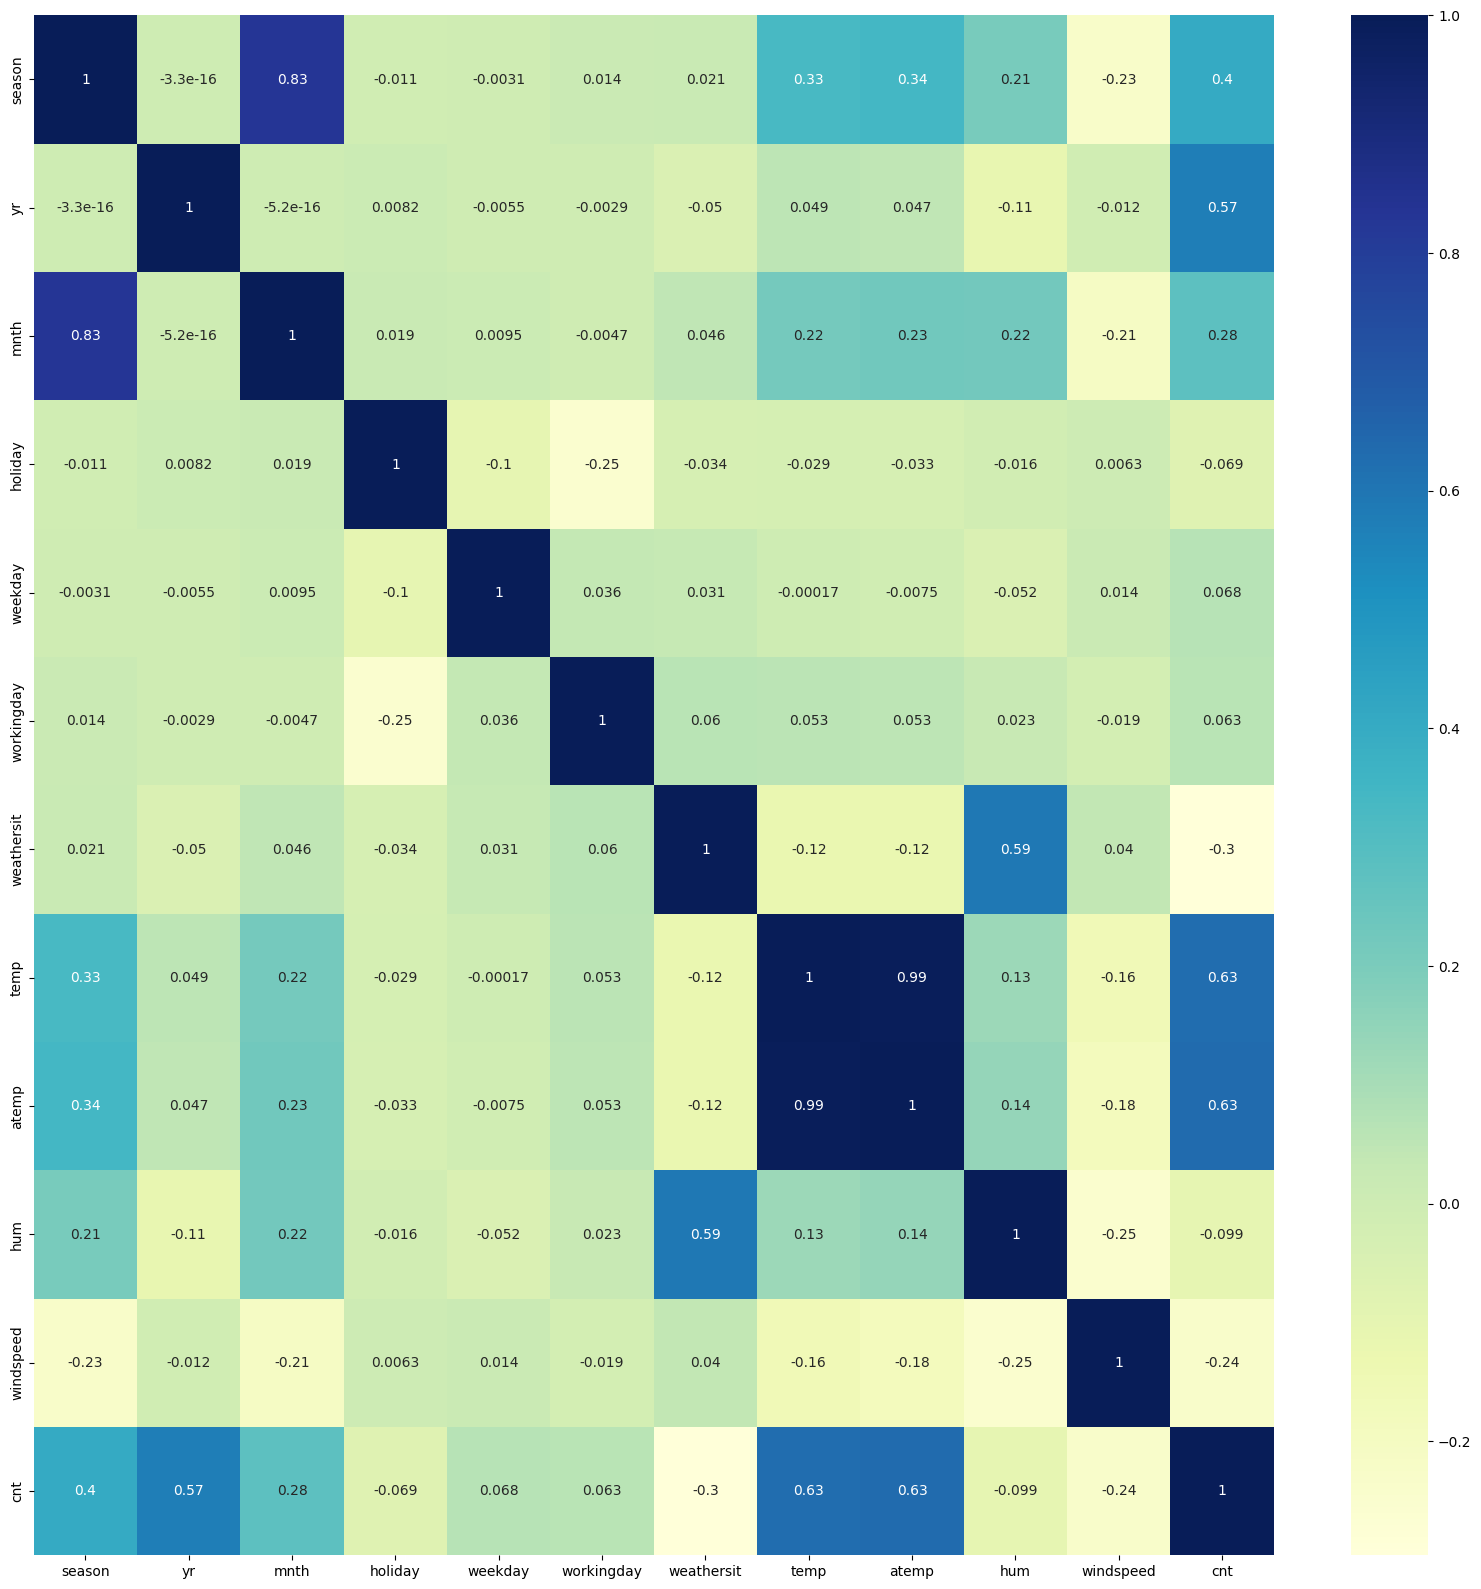

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(bike_sharing.corr(),annot=True,cmap="YlGnBu")
plt.show()

**Inferences**

- atemp and temp have the same correlation with cnt.
- yr and sesaon also have high correlation with cnt.
- temp and atemp are also highly correlated which is understandable.

### Visualizing the Categorical variables.

We will create box plots for following categorical vaiables.
 - season
 - yr
 - mnth
 - holiday
 - weekday
 - workingday
 - weathersit

<Axes: xlabel='weathersit', ylabel='cnt'>

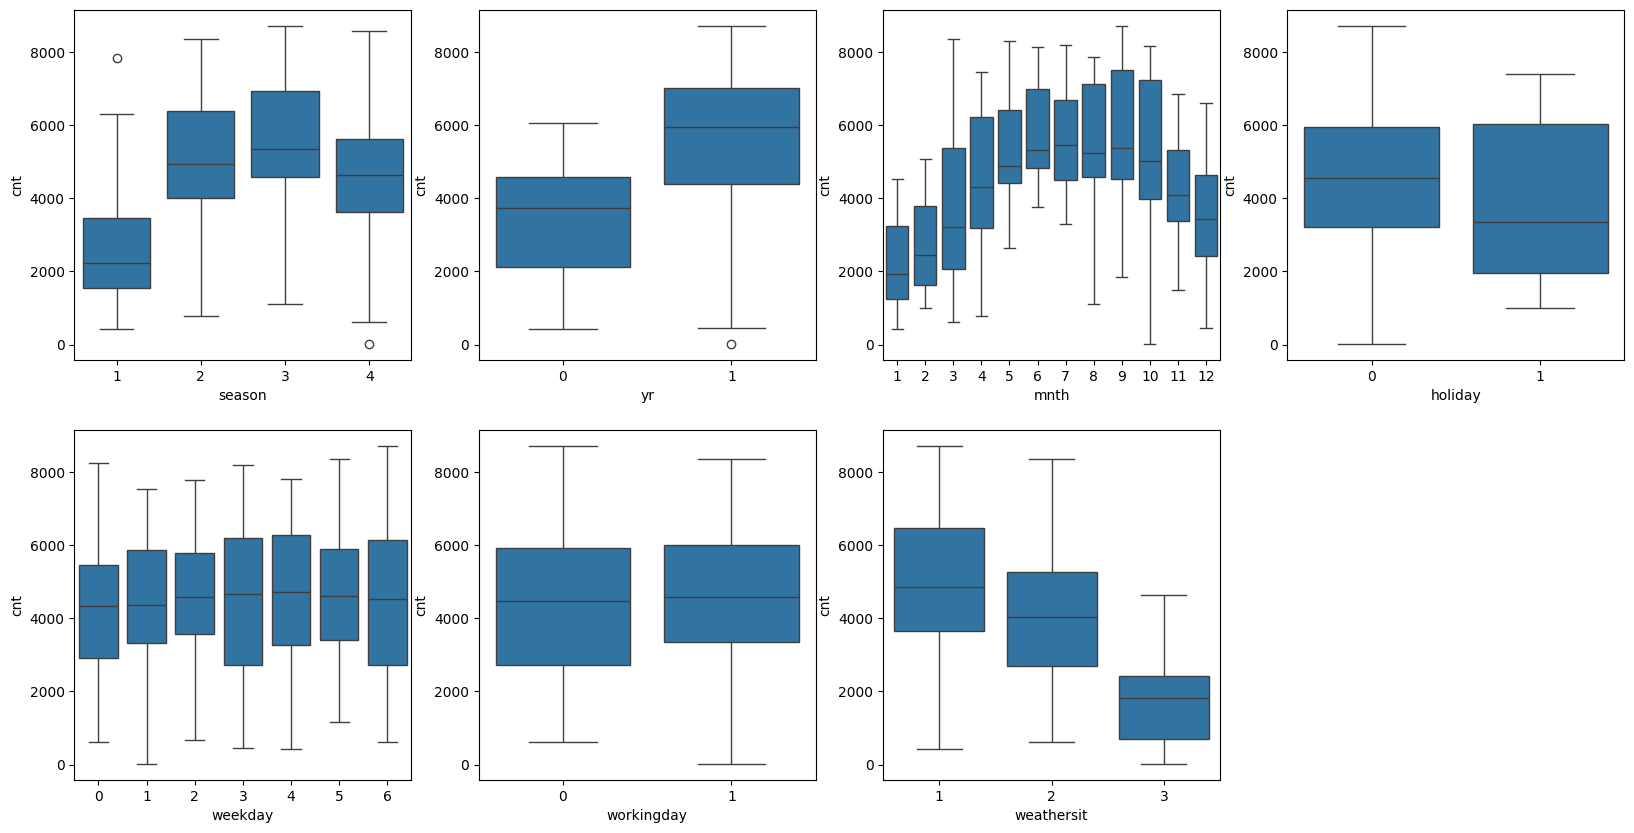

In [11]:

plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt', data=bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt', data=bike_sharing)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt', data=bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt', data=bike_sharing)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt', data=bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt', data=bike_sharing)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt', data=bike_sharing)

**Inferences**
From the above boxplots, we can infer following insights.

- **season**: season shows a clear impact on total bike rentals with season 1 (spring) with the lowest total rentals and seson 3(fall) with the higheest total rentals.
- **yr**: year 1 (2019) had visibly higher total rentals than year 0 (2018), showing an upward trend in bike rentals before the covid lockdown in 2019.
- **mnth**: months also have clear trend in total bike rental with warmer months 4-10 (April - Oct) showing higher rental than colder months (november-march) which can be backed by the fact that people prefer closed vehicles such as cars, trains, buses etc during cold temperatures.
- **holiday**: holidays doesn't seem to be an effective factor as although the upper limit for non-holiday is higher the 3rd quartile seems to be similar for both. with holidays having a lower first quartile.
- **weekday**: all weekdays seems to have same median retnals with little variation.
- **workingday**: working and non-working days also have similar medians.
- **weathersit**: weathersit 1 (clear/ partly cloudy) days have the highest median and upper limit followed by 2 (mist+cloudy) and 3 (raining or snowing). This is also inline with general public behavior as people prefer bikes on clear days and avoid open vehicles during rain and snow.

## Mapping Categorical values

Categorical values like season and year have numberical values, we'll replace the numerical values with categorical values before creating dummpy variables. 
As part of Mapping we will create following mappings - 
- season:
  - 1: spring
  - 2: summer
  - 3: fall
  - 4: winter
- mnth:
  - 1 : jan
  - 2 : feb
  - 3 : mar
  - 4 : apr
  - 5 : may
  - 6 : jun
  - 7 : jul
  - 8 : aug
  - 9 : sep
  - 10 : oct
  - 11 : nov
  - 12 : dec
- weekday:
  - 0 : sun
  - 1 : mon
  - 2 : tue
  - 3 : wed
  - 4 : thu
  - 5 : fri
  - 6 : sat
- weathersit:
  - 1 : good
  - 2 : moderate
  - 3 : bad
  - 4 : severe

In [12]:
bike_sharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace=True)
bike_sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)
bike_sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)
bike_sharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [13]:
print(bike_sharing.season.value_counts())
print(bike_sharing.mnth.value_counts())
print(bike_sharing.weekday.value_counts())
print(bike_sharing.weathersit.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64
good        463
moderate    246
bad          21
Name: weathersit, dtype: int64


In [14]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Creating Dummy Variables

We'll create dummy variables for the categorical variables that we mapped in the last section.

In [15]:
season_dummy = pd.get_dummies(bike_sharing.season,drop_first=True)
mnth_dummy = pd.get_dummies(bike_sharing.mnth,drop_first=True)
weekday_dummy = pd.get_dummies(bike_sharing.weekday,drop_first=True)
weathersit_dummy = pd.get_dummies(bike_sharing.weathersit,drop_first=True)

In [16]:
print(season_dummy.head())
print(mnth_dummy.head())
print(weekday_dummy.head())
print(weathersit_dummy.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sept
0    0    0    0    1    0    0    0    0    0    0     0
1    0    0    0    1    0    0    0    0    0    0     0
2    0    0    0    1    0    0    0    0    0    0     0
3    0    0    0    1    0    0    0    0    0    0     0
4    0    0    0    1    0    0    0    0    0    0     0
   mon  sat  sun  thu  tue  wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
3    0    0    0    0    1    0
4    0    0    0    0    0    1
   good  moderate
0     0         1
1     0         1
2     1         0
3     1         0
4     1         0


**Next we will append the dummy variables in the dataframe and drop the original variables.**

In [17]:
bike_sharing = pd.concat([bike_sharing,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy],axis=1)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    uint8  
 13  summer      730 non-null    uint8  
 14  winter      730 non-null    uint8  
 15  aug         730 non-null    uint8  
 16  dec         730 non-null    uint8  
 17  feb         730 non-null    uint8  
 18  jan         730 non-null    uint8  
 19  jul         730 non-null    u

In [18]:
bike_sharing.drop(['season','mnth','weekday','weathersit'],inplace=True,axis=1)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  jul         730 non-null    uint8  
 16  jun         730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

## Preparing the data for modelling

### Splitting the data

In [19]:
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing,train_size=.7,random_state=100)
print(bike_sharing_train.shape)
print(bike_sharing_test.shape)

(510, 30)
(220, 30)


### Scaling the Numerical Variables

As part of the scaling we will use MinMaxScaler() and scale following variables. 
- temp
- atemp
- hum
- windspeed

In [20]:
scale_vars = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
bike_sharing_train[scale_vars] = scaler.fit_transform(bike_sharing_train[scale_vars])
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1683,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Training the Model

### Calculating X and y variables.

In [21]:
y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

**I'll use RFE to identify variable with high relevance.**

In [22]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=18)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
selected_columns = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
print("All columns with their RFE ranking...")
print(sorted(selected_columns,key=lambda x: x[2]))
print("Selected colums with their ranking...")
print(col)

All columns with their RFE ranking...
[('yr', True, 1), ('holiday', True, 1), ('workingday', True, 1), ('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('spring', True, 1), ('summer', True, 1), ('winter', True, 1), ('dec', True, 1), ('feb', True, 1), ('jan', True, 1), ('jul', True, 1), ('nov', True, 1), ('sept', True, 1), ('sat', True, 1), ('good', True, 1), ('moderate', True, 1), ('atemp', False, 2), ('may', False, 3), ('aug', False, 4), ('sun', False, 5), ('mon', False, 6), ('tue', False, 7), ('thu', False, 8), ('wed', False, 9), ('oct', False, 10), ('jun', False, 11), ('mar', False, 12)]
Selected colums with their ranking...
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sept', 'sat',
       'good', 'moderate'],
      dtype='object')


### Building Model with statsmodel for detailed statistics

#### Model 1 - Starting with 18 Variables selected by RFE.

In [23]:
# Defining VIF Function so that we can use it in later models. 

def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [24]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit()
print(lm1.summary())
calculate_VIF(col,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.80e-190
Time:                        19:53:23   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     491   BIC:                             8321.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        283.1202    424.470      0.667      0.5

,Features,VIF
4,hum,27.09
3,temp,26.99
16,good,16.28
17,moderate,9.57
6,spring,6.59
2,workingday,5.45
5,windspeed,4.73
8,winter,4.55
7,summer,3.35
11,jan,2.52


#### Model 2 - Removing hum variable

In [25]:
X_train_new = X_train[col].drop(['hum'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_sm).fit()
print(lm2.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.63e-187
Time:                        19:53:24   Log-Likelihood:                -4109.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     492   BIC:                             8331.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -685.0555    352.017     -1.946      0.0

,Features,VIF
15,good,16.23
3,temp,15.68
16,moderate,9.22
5,spring,5.58
2,workingday,5.40
4,windspeed,4.71
7,winter,3.42
6,summer,2.84
10,jan,2.39
0,yr,2.08


#### Model 3 - Removing workingday variable

In [26]:
X_train_new = X_train_new.drop(['workingday'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train,X_train_sm).fit()
print(lm3.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.2
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.09e-185
Time:                        19:53:24   Log-Likelihood:                -4117.7
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     493   BIC:                             8341.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -308.8290    344.957     -0.895      0.3

,Features,VIF
14,good,16.02
2,temp,14.49
15,moderate,9.04
4,spring,5.47
3,windspeed,4.68
6,winter,3.37
5,summer,2.78
9,jan,2.37
0,yr,2.08
8,feb,1.93


#### Model 4 - Removing sat variable

In [27]:
X_train_new = X_train_new.drop(['sat'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_sm).fit()
print(lm4.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.44e-185
Time:                        19:53:24   Log-Likelihood:                -4119.4
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     494   BIC:                             8338.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -273.5668    345.124     -0.793      0.4

,Features,VIF
13,good,16.01
2,temp,14.48
14,moderate,9.03
4,spring,5.46
3,windspeed,4.66
6,winter,3.37
5,summer,2.78
9,jan,2.37
0,yr,2.08
8,feb,1.92


#### Model 5 - Removing windspeed variable

In [28]:
X_train_new = X_train_new.drop(['windspeed'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_sm).fit()
print(lm5.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.1
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.61e-178
Time:                        19:53:24   Log-Likelihood:                -4139.4
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     495   BIC:                             8372.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -951.8765    340.987     -2.792      0.0

,Features,VIF
12,good,15.84
2,temp,14.10
13,moderate,8.95
3,spring,4.93
5,winter,3.26
4,summer,2.56
8,jan,2.36
0,yr,2.08
7,feb,1.92
10,nov,1.91


#### Model 6 - Removing moderate variable

In [29]:
X_train_new = X_train_new.drop(['moderate'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_sm).fit()
print(lm6.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          9.88e-164
Time:                        19:53:24   Log-Likelihood:                -4176.8
No. Observations:                 510   AIC:                             8382.
Df Residuals:                     496   BIC:                             8441.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        744.5897    303.046      2.457      0.0

,Features,VIF
2,temp,5.08
3,spring,3.71
5,winter,2.74
12,good,2.73
8,jan,2.18
0,yr,2.07
4,summer,1.92
7,feb,1.88
10,nov,1.82
9,jul,1.60


#### Model 7 - Removing jan variable

In [30]:
X_train_new = X_train_new.drop(['jan'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_sm).fit()
print(lm7.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.28e-164
Time:                        19:53:24   Log-Likelihood:                -4177.9
No. Observations:                 510   AIC:                             8382.
Df Residuals:                     497   BIC:                             8437.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        581.6078    283.058      2.055      0.0

,Features,VIF
2,temp,4.98
11,good,2.73
5,winter,2.66
0,yr,2.06
3,spring,1.91
4,summer,1.90
9,nov,1.80
8,jul,1.59
6,dec,1.45
7,feb,1.40


#### Model 8 - Removing feb variable

In [31]:
X_train_new = X_train_new.drop(['feb'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm8 = sm.OLS(y_train,X_train_sm).fit()
print(lm8.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     179.7
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.79e-165
Time:                        19:53:24   Log-Likelihood:                -4178.0
No. Observations:                 510   AIC:                             8380.
Df Residuals:                     498   BIC:                             8431.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        575.8529    282.433      2.039      0.0

,Features,VIF
2,temp,4.98
10,good,2.73
5,winter,2.65
0,yr,2.06
4,summer,1.90
8,nov,1.80
7,jul,1.59
3,spring,1.50
6,dec,1.43
9,sept,1.34


#### Model 9 - Removing dec variable

In [32]:
X_train_new = X_train_new.drop(['dec'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm9 = sm.OLS(y_train,X_train_sm).fit()
print(lm9.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.68e-166
Time:                        19:53:24   Log-Likelihood:                -4178.3
No. Observations:                 510   AIC:                             8379.
Df Residuals:                     499   BIC:                             8425.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        523.1370    274.101      1.909      0.0

,Features,VIF
2,temp,4.96
9,good,2.71
0,yr,2.06
5,winter,2.05
4,summer,1.90
6,jul,1.59
7,nov,1.58
3,spring,1.46
8,sept,1.33
1,holiday,1.06


#### Model 10 - Removing nov variable

In [33]:
X_train_new = X_train_new.drop(['nov'], axis=1)
X_train_sm = sm.add_constant(X_train_new)
lm10 = sm.OLS(y_train,X_train_sm).fit()
print(lm10.summary())
calculate_VIF(X_train_new.columns,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.5
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.06e-167
Time:                        19:53:24   Log-Likelihood:                -4179.0
No. Observations:                 510   AIC:                             8378.
Df Residuals:                     500   BIC:                             8420.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        475.9607    270.939      1.757      0.0

,Features,VIF
2,temp,4.95
8,good,2.70
0,yr,2.06
4,summer,1.90
6,jul,1.59
5,winter,1.52
3,spring,1.46
7,sept,1.32
1,holiday,1.04


**This is our final model. VIF for all selected columns is below 5 and coefficient p value is also within acceptable range.**

## Residual Analysis

In [34]:
y_train_pred = lm10.predict(X_train_sm)
y_train_pred.head(10)

576    6447.157849
426    3832.092619
728    3790.440206
482    4604.907993
111    2330.943209
580    7388.020752
500    6859.576412
479    5981.303709
472    5080.635381
455    4874.790216
dtype: float64

<Axes: ylabel='Density'>

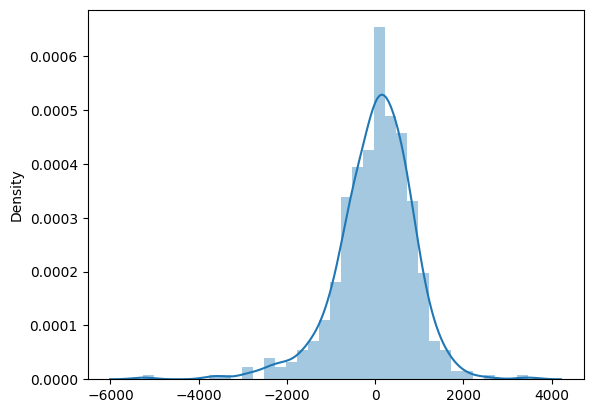

In [35]:
residuals = y_train - y_train_pred
sns.distplot(residuals)

- The errors are centered around zero. 
- Error distribution is normally distributed.

## Making Predictions

### Transforming the test dataset

In [35]:
scale_vars = ['temp','atemp','hum','windspeed']
bike_sharing_test[scale_vars] = scaler.transform(bike_sharing_test[scale_vars])
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


### Selecting final columns

In [36]:
final_col_list = X_train_new.columns
final_col_list

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'jul', 'sept',
       'good'],
      dtype='object')

### Adding constant to test dataset

In [37]:
y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test[final_col_list]
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,spring,summer,winter,jul,sept,good
184,1.0,0,1,0.831783,0,0,0,1,0,0
535,1.0,1,0,0.901354,0,1,0,0,0,1
299,1.0,0,0,0.511964,0,0,1,0,0,0
221,1.0,0,0,0.881625,0,0,0,0,0,1
152,1.0,0,0,0.817246,0,1,0,0,0,1


## Prediction on Test Dataset

In [38]:
y_test_pred = lm10.predict(X_test_sm)

## Final R2 Score

In [39]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7917483264887916